## Interprétation, interprétabilité et explicabilité ; et Pourquoi tout est-il important ? 

Nous vivons dans un monde dont les règles et les procédures sont régies par des données et des algorithmes. Par exemple, il existe des règles déterminant qui est approuvé pour un crédit ou libéré sous caution, et quelles publications sur les réseaux sociaux peuvent être censurées. Il existe également des procédures pour déterminer quelles tactiques de marketing sont les plus efficaces et quelles caractéristiques de la radiographie pulmonaire pourraient diagnostiquer un cas positif de pneumonie. Vous vous y attendez parce que ce n'est pas nouveau.



Mais il n'y a pas si longtemps, des règles et des procédures comme celles-ci étaient codées en dur dans les logiciels, les manuels et les formulaires papier, et les humains étaient les décideurs ultimes. Souvent, c'était entièrement à la discrétion humaine. Les décisions dépendaient de la discrétion humaine parce que les règles et les procédures étaient rigides et, par conséquent, pas toujours applicables. 

Il y avait toujours des exceptions, il fallait donc un humain pour les faire. Par exemple, si vous demandiez un prêt hypothécaire, votre approbation dépendait d'un historique de crédit acceptable et raisonnablement long. Ces données, à leur tour, produiraient une cote de crédit à l'aide d'un algorithme de notation. Ensuite, la banque avait des règles qui déterminaient quel score était assez bon pour l'hypothèque que vous vouliez. 

Votre agent de crédit peut le suivre ou le contourner. De nos jours, les institutions Bnancières forment des modèles sur des milliers de résultats hypothécaires, avec des dizaines de variables. Ces modèles peuvent être utilisés pour déterminer la probabilité que vous fassiez défaut sur un prêt hypothécaire avec une précision présumée élevée. S'il y a un agent de crédit pour valider l'approbation ou le refus, ce n'est plus simplement une ligne directrice mais une décision algorithmique. Comment cela pourrait-il être faux ? Comment cela pourrait-il être juste ? Gardez cette idée en tête car, tout au long de ce livre, nous apprendrons les réponses à ces questions et bien d'autres encore ! 

Interpréter les décisions prises par un modèle d'apprentissage automatique, c'est y trouver un sens, mais en plus, vous pouvez remonter à sa source et au processus qui l'a transformé. 

Ce chapitre présente l'interprétation de l'apprentissage automatique et des concepts connexes tels que l'interprétabilité, l'explicabilité, les modèles de boîte noire et la transparence. Ce chapitre fournit des définitions de ces termes pour éviter toute ambiguïté et souligne la valeur de l'interprétabilité de l'apprentissage automatique. Voici les principaux sujets que nous allons aborder :

* Qu'est-ce que l'interprétation par apprentissage automatique ?
* Comprendre la différence entre interprétation et l'explicabilité
* Une analyse de rentabilisation pour l'interprétabilité

Commençons !

## Qu'est-ce que l'interprétation de l'apprentissage automatique ? 

Interpréter quelque chose, c'est en expliquer le sens. Dans le contexte de l'apprentissage automatique, ce quelque chose est un algorithme. Plus précisément, cet algorithme est un algorithme mathématique qui prend des données d'entrée et produit une sortie, un peu comme avec n'importe quelle formule. Examinons le modèle le plus basique, la régression linéaire simple, illustrée dans la formule suivante :

$$ y = \alpha_0 + \alpha_1 x_1$$


Une fois ajusté aux données, la signification de ce modèle est que les prédictions sont une somme pondérée des caractéristiques avec les coefecients . Dans ce cas, il n'y a qu'une seule caractéristique $x_1$ ou variable prédictive, et la variable est généralement appelée variable de réponse ou cible. Une simple formule de régression linéaire explique à elle seule la transformation, qui est effectuée sur les données d'entrée $x_1$ pour produire la sortie y. L'exemple suivant peut illustrer ce concept plus en détail.

## Comprendre un modèle de prédiction de poids simple

Si vous allez sur cette page Web gérée par l'Université de Californie, http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights, vous pouvez trouver un lien pour télécharger un ensemble de données de 25 000 enregistrements synthétiques de poids et de tailles de jeunes de 18 ans. Nous n'utiliserons pas l'ensemble de données complet, mais uniquement l'exemple de table sur la page Web elle-même avec 200 enregistrements. Nous récupérons le tableau de la page Web et appliquons un modèle de régression linéaire aux données. Le modèle utilise la taille pour prédire le poids. En d'autres termes, x1 = height  et y= weight  , la formule du modèle de régression linéaire serait donc la suivante:

$$ weight  = \beta_0 + βheight$$


In [ ]:
import math
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
page = requests.get(url)

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
tbl = soup.find("table",{"class":"wikitable"})

In [ ]:
height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)','Weight(Pounds)']]

In [ ]:
num_records = height_weight_df.shape[0]
print(num_records)

200


In [ ]:
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records, 1)

In [ ]:
model = linear_model.LinearRegression()
_ = model.fit(x,y)

In [ ]:
print("ŷ = " + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " x₁")

ŷ = -106.02770644878137 + 3.4326761292716297 x₁


In [ ]:
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

7.7587373803882205


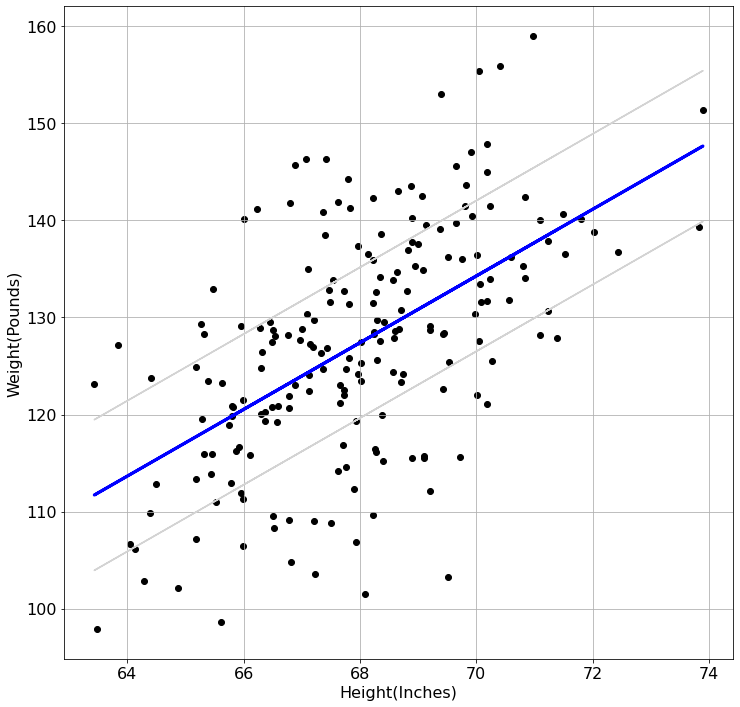

In [ ]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 16})
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.title('')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)
plt.show()

Comme vous pouvez le constater sur le graphique de la figure, il arrive souvent que les valeurs réelles soient de 20 à 25 livres de la prédiction. Pourtant, l'erreur absolue moyenne peut vous faire croire que l'erreur est toujours plus proche de 8 . C'est pourquoi il est essentiel de visualiser l'erreur du modèle pour comprendre sa distribution. À en juger par ce graphique, nous pouvons dire qu'il n'y a pas de drapeaux rouges qui ressortent de cette distribution, comme des résidus plus dispersés pour une plage de hauteurs que pour d'autres. 

Comme il est plus ou moins également réparti, on dit qu'il est homoscédastique. Dans le cas de la régression linéaire, il s'agit de l'une des nombreuses hypothèses de modèle que vous devez tester, ainsi que la linéarité, la normalité, l'indépendance et l'absence de multicolinéarité (s'il y a plus d'une caractéristique). Ces hypothèses garantissent que vous utilisez le bon modèle pour le travail. En d'autres termes, la taille et le poids peuvent être expliqués par une relation linéaire, et c'est une bonne idée de le faire, statistiquement parlant.


Avec ce modèle, nous essayons d'établir une relation linéaire entre x taille et y poids. Cette association est appelée corrélation linéaire. Une façon de mesurer la force de cette relation est d'utiliser le coefficient de corrélation de Pearson. Cette méthode statistique mesure l'association entre deux variables en utilisant leur covariance divisée par leurs écarts types. C'est un nombre compris entre -1 et 1 où plus le nombre est proche de zéro, plus l'association est faible. Si le nombre est positif, il y a une association positive, et s'il est négatif, il y a une association négative. En Python, vous pouvez calculer le coefficient de corrélation de Pearson avec la fonction pearsonr de scipy, comme illustré ici :

In [ ]:
corr, pval = pearsonr(x[:,0], y[:,0])
print(corr)

0.5568647346122995


Le nombre est positif, ce qui n'est pas surprenant car à mesure que la taille augmente, le poids a également tendance à augmenter, mais il est également plus proche de 1 que de 0 , indiquant qu'il est fortement corrélé. Le deuxième nombre produit par la fonction de pearsonr est la valeur pour tester la non-corrélation. Si nous testons qu'il est inférieur à un niveau d'erreur de 5 %, nous pouvons dire qu'il existe des preuves suffisantes de cette corrélation, comme illustré ici :

In [ ]:
print(pval < 0.05)

True


Comprendre comment un modèle fonctionne et dans quelles circonstances peut nous aider à expliquer pourquoi il fait certaines prédictions, et quand il ne le peut pas. Imaginons qu'on nous demande d'expliquer pourquoi quelqu'un qui mesure 71 pouces devrait peser 134 livres, mais peser 18 livres de plus. A en juger par ce que l'on sait du modèle, cette marge d'erreur n'est pas inhabituelle même si elle n'est pas idéale. Cependant, il existe de nombreuses circonstances dans lesquelles nous ne pouvons pas nous attendre à ce que ce modèle soit fiable. Et si on nous demandait de prédire le poids d'une personne de 56 pouces à l'aide de ce modèle ? Pourrions-nous assurer le même niveau de précision ? Certainement pas, car nous avons calé le modèle sur les données de sujets d'au moins 63 pouces. Idem si on nous demandait de prédire le poids d'un enfant de 9 ans, car les données d'entraînement concernaient des enfants de 18 ans.


Malgré des résultats acceptables, ce modèle de prédiction de poids n'était pas un exemple réaliste. Si vous vouliez être plus précis mais, plus important encore, fidèle à ce qui peut réellement impacter le poids d'un individu, vous auriez besoin d'ajouter plus de variables. Vous pouvez ajouter, par exemple, le sexe, l'âge, l'alimentation et le niveau d'activité. C'est là que ça devient intéressant car il faut s'assurer qu'il est juste de les inclure, ou de ne pas les inclure. Par exemple, si le sexe était inclus alors que la plupart de notre ensemble de données était composé d'hommes, comment pourriez-vous garantir l'exactitude pour les femmes ? C'est ce qu'on appelle le biais de sélection. Et si le poids avait plus à voir avec des choix de vie et des circonstances telles que la pauvreté et la grossesse qu'avec le sexe ? Si ces variables ne sont pas incluses, cela s'appelle biais de variable omis. Et puis, est-il judicieux d'inclure la variable sensible du genre au risque d'ajouter un biais au modèle ?


Une fois que vous avez vérifié l'équité de plusieurs fonctionnalités, vous pouvez découvrir et expliquer quelles fonctionnalités ont un impact sur les performances du modèle. Nous appelons cette caractéristique l'importance. Cependant, à mesure que nous ajoutons plus de variables, nous augmentons la complexité du modèle. Paradoxalement, c'est un problème d'interprétation, et nous l'explorerons plus en détail dans les chapitres suivants. Pour l'instant, la clé à retenir devrait être que l'interprétation du modèle a beaucoup à voir avec l'explication de ce qui suit

1. Pouvons-nous expliquer que les prédictions ont été faites de manière juste ?
2. Pouvons-nous faire remonter les prédictions de manière fiable à quelque chose ou à quelqu'un ?
3. Pouvons-nous expliquer comment les prédictions ont été faites? Pouvons-nous expliquer le fonctionnement du modèle ?


Et finalement, la question à laquelle nous essayons de répondre est la suivante : pouvons-nous faire confiance au modèle ?


Les trois principaux concepts de l'apprentissage automatique interprétable sont directement liés aux trois questions précédentes et portent l'acronyme de FAT, qui signifie équité, responsabilité et transparence. Si vous pouvez expliquer que les prédictions ont été faites sans biais discernable, alors il y a équité. Si vous pouvez expliquer pourquoi il fait certaines prédictions, alors il y a la responsabilité. Et si vous pouvez expliquer comment les prédictions ont été faites et comment le modèle fonctionne, alors il y a la transparence. De nombreuses préoccupations éthiques sont associées à ces concepts, comme le montre la figure 1.2 :


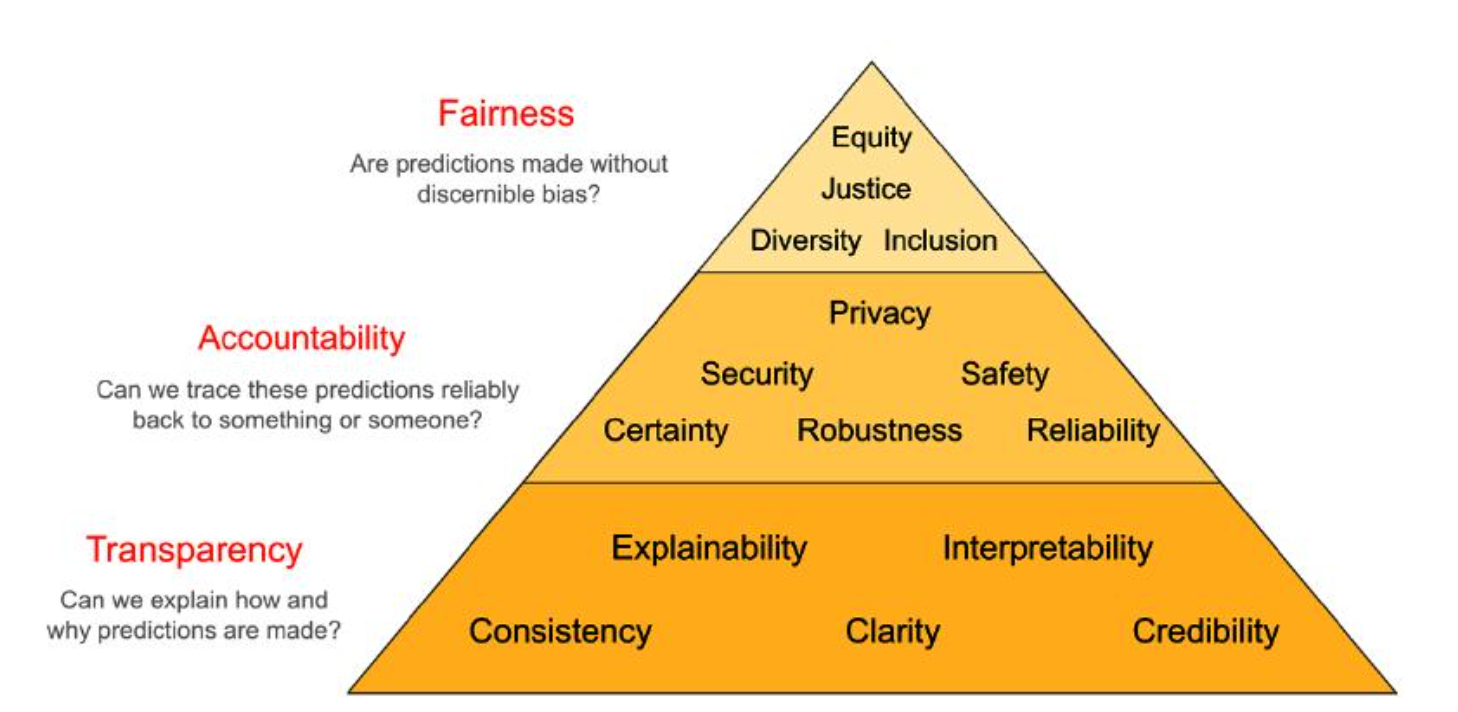

Certains chercheurs et entreprises ont étendu le FAT dans un cadre plus large d'intelligence artificielle (IA) éthique, transformant ainsi le FAT en FATE. L'IA éthique fait partie d'une discussion encore plus large sur la gouvernance algorithmique et des données. Cependant, les deux concepts se chevauchent beaucoup, car l'apprentissage automatique interprétable est la façon dont les principes FAT et les préoccupations éthiques sont mis en œuvre dans l'apprentissage automatique. 

Dans ce guide, nous discuterons de l'éthique dans ce contexte. Par exemple, le chapitre 13, Robustesse de l'adversaire, concerne la fiabilité, la sûreté et la sécurité. Le chapitre 11, Méthodes d'atténuation des biais et d'inférence causale concerne l'équité. Cela étant dit, l'apprentissage automatique interprétable peut être exploité sans objectif éthique, et aussi pour des raisons contraires à l'éthique.

## Comprendre la différence entre l'interprétabilité et l'explicabilité 

Quelque chose que vous avez probablement remarqué en lisant les premières pages de ce guide est que les verbes interpréter et expliquer, ainsi que les noms interprétation et explication, ont été utilisés de manière interchangeable. Ce n'est pas surprenant, étant donné qu'interpréter, c'est expliquer le sens de quelque chose. Malgré cela, les termes liés à l'interprétabilité et à l'explicabilité ne doivent pas être utilisés de manière interchangeable, même s'ils sont souvent confondus avec des synonymes.

## Qu'est-ce que l'interprétabilité ?

L'interprétabilité est la mesure dans laquelle les humains, y compris les non-experts en la matière, peuvent comprendre la cause et l'effet, ainsi que les entrées et les sorties, d'un modèle d'apprentissage automatique. Dire qu'un modèle a un haut niveau d'interprétabilité signifie que vous pouvez décrire de manière humainement interprétable son inférence. En d'autres termes, pourquoi une entrée dans un modèle produit-elle une sortie spécifique ? Quelles sont les exigences et les contraintes des données d'entrée ? Quelles sont les limites de confiance des prédictions ? Ou pourquoi une variable a-t-elle un efeet plus important qu'une autre ? Pour l'interprétabilité, détailler le fonctionnement d'un modèle n'est pertinent que dans la mesure où il peut expliquer ses prédictions et justifier qu'il s'agit du bon modèle pour le cas d'utilisation.


Dans l'exemple de ce chapitre, vous pourriez expliquer qu'il existe une relation linéaire entre la taille et le poids humains, il est donc logique d'utiliser la régression linéaire plutôt qu'un modèle non linéaire. Vous pouvez le prouver statistiquement car les variables impliquées ne violent pas les hypothèses de régression linéaire. Même lorsque les statistiques sont de notre côté, vous devez toujours consulter le domaine de connaissance du domaine impliqué dans le cas d'utilisation. Dans celui-ci, on se rassure, biologiquement parlant, car notre connaissance de la physiologie humaine ne contredit pas le lien entre taille et poids

## Méfiez-vous de la complexité 

De nombreux modèles d'apprentissage automatique sont intrinsèquement plus difficiles à comprendre simplement en raison des mathématiques impliquées dans le fonctionnement interne du modèle ou de l'architecture spécifique du modèle. En plus de cela, de nombreux choix sont faits qui peuvent augmenter la complexité et rendre les modèles moins interprétables, de la sélection de jeux de données à la sélection et à l'ingénierie de caractéristiques, en passant par la formation de modèles et les choix de réglage. Cette complexité rend l'explication de son fonctionnement difficile. L'interprétabilité de l'apprentissage automatique est un domaine de recherche très actif, il y a donc encore beaucoup de débats sur sa définition précise. Le débat porte sur la question de savoir si une transparence totale est nécessaire pour qualifier un modèle d'apprentissage automatique comme suffisamment interprétable. Ce guide privilégie l'idée que la définition de l'interprétabilité ne doit pas nécessairement exclure des modèles opaques, pour la plupart complexes, tant que les choix effectués ne compromettent pas leur fiabilité. Ce compromis est ce qu'on appelle généralement l'interprétabilité post-hoc. Après tout, tout comme un modèle d'apprentissage automatique complexe, nous ne pouvons pas expliquer exactement comment un cerveau humain fait un choix, mais nous faisons souvent confiance à sa décision car nous pouvons demander à un humain son raisonnement. L'interprétation post-hoc de l'apprentissage automatique est exactement la même chose, sauf que c'est un humain qui explique le raisonnement au nom du modèle. L'utilisation de ce concept particulier d'interprétabilité est avantageuse car nous pouvons interpréter des modèles opaques et ne pas sacrifier la précision de nos prédictions. Nous en discuterons plus en détail au chapitre 3, Défis d'interprétation.

## Quand l'interprétabilité est-elle importante ? 

Les systèmes de prise de décision n'exigent pas toujours l'interprétabilité. Il y a deux cas qui sont proposés comme exceptions dans la recherche, décrits ici : 

* Lorsque des résultats incorrects n'ont pas de conséquences significatives. Par exemple, que se passe-t-il si un modèle d'apprentissage automatique est formé pour rechercher et lire le code postal dans un colis, le lit parfois de manière erronée et l'envoie ailleurs ? Il y a peu de risque de biais discriminatoire et le coût d'une mauvaise classification est relativement faible. Cela n'arrive pas assez souvent pour augmenter le coût au-delà des seuils acceptables.

* Lorsqu'il y a des conséquences, mais celles-ci ont été suffisamment étudiées et validées dans le monde réel pour prendre des décisions sans intervention humaine. C'est le cas d'un système d'alerte de trafic et d'évitement de collision (TCAS), qui alerte le pilote d'un autre avion qui présente une menace de collision en vol.


D'un autre côté, l'interprétabilité est nécessaire pour que ces systèmes aient les attributs suivants :

* Exploitable pour les connaissances scientifiques : les météorologues ont beaucoup à apprendre d'un modèle climatique, mais seulement s'il est facile à interpréter.

* Fiable et sûr : les décisions prises par un véhicule autonome doivent être déboguables afin que ses développeurs puissent comprendre les points d'échec.
* Éthique : un modèle de traduction peut utiliser des incorporations de mots sexistes qui entraînent des traductions discriminatoires, mais vous devez être capable de trouver ces cas facilement pour les corriger. Cependant, le système doit être conçu de manière à ce que vous puissiez être informé d'un problème avant qu'il ne soit rendu public.

* Concluant et cohérent : parfois, les modèles d'apprentissage automatique peuvent avoir des objectifs incomplets et mutuellement exclusifs, par exemple le système de contrôle du cholestérol peut ne pas tenir compte de la probabilité qu'un patient adhère au régime alimentaire ou au régime médicamenteux, ou il peut y avoir un compromis entre un objectif et un autre, comme la sécurité et la non-discrimination.


En expliquant les décisions d'un modèle, nous pouvons combler les lacunes dans notre compréhension du problème – son incomplétude. L'un des problèmes les plus importants est qu'étant donné la grande précision de nos solutions d'apprentissage automatique, nous avons tendance à augmenter notre niveau de confiance à un point où nous pensons que nous comprenons parfaitement le problème. Ensuite, nous sommes induits en erreur en pensant que notre solution couvre TOUT ! Au début de ce guide, nous avons expliqué que l'exploitation des données pour produire des règles algorithmiques n'a rien de nouveau. 

Cependant, nous avions l'habitude de deviner ces règles, et maintenant nous ne le faisons plus. Par conséquent, un humain était responsable, et maintenant c'est l'algorithme. Dans ce cas, l'algorithme est un modèle d'apprentissage automatique qui est responsable de toutes les ramifcations éthiques que cela implique. Ce commutateur a beaucoup à voir avec la précision. Le problème est que, bien qu'un modèle puisse dépasser la précision humaine dans l'ensemble, les modèles d'apprentissage automatique n'ont pas encore interprété ses résultats comme un humain le ferait. Par conséquent, il ne remet pas ses décisions en question, donc en tant que solution, il manque un niveau d'exhaustivité souhaitable. et c'est pourquoi nous devons interpréter les modèles afin de pouvoir couvrir au moins une partie de cet écart. Alors, pourquoi l'interprétation de l'apprentissage automatique ne fait-elle pas déjà partie intégrante du pipeline ? En plus de notre tendance à nous concentrer uniquement sur la précision, l'un des plus gros obstacles est le concept décourageant des modèles de boîte noire.

## Que sont les modèles de boîte noire ? 

C'est juste un autre terme pour les modèles opaques. Une boîte noire fait référence à un système dans lequel seules les entrées et les sorties sont observables, et vous ne pouvez pas voir ce qui transforme les entrées en sorties. Dans le cas de l'apprentissage automatique, un modèle de boîte noire peut être ouvert, mais ses mécanismes ne sont pas faciles à comprendre.


## Que sont les modèles boîte blanche ? 

Ceux-ci sont à l'opposé des modèles boîte noire. Ils sont également dits transparents car ils permettent d'obtenir une transparence d'interprétation totale ou quasi-totale. Nous les appelons intrinsèquement interprétables dans ce guide, et nous les couvrons plus en détail au chapitre 3, Défis d'interprétation. 

## Qu'est-ce que l'explicabilité ? 

L'explicabilité englobe tout ce qu'est l'interprétabilité. La différence est qu'il va plus loin sur l'exigence de transparence que sur l'interprétabilité, car il exige des explications conviviales pour le fonctionnement interne d'un modèle et le processus de formation du modèle, et pas seulement l'inférence du modèle. 

Selon l'application, cette exigence peut s'étendre à divers degrés de transparence du modèle, de la conception et de l'algorithme. Il existe trois types de transparence, décrits ici :
*  Transparence du modèle : être capable d'expliquer comment un modèle est formé étape par étape. Dans le cas de notre modèle de prédiction de poids simple, nous pouvons expliquer comment la méthode d'optimisation appelée les moindres carrés ordinaires trouve le coefecient qui minimise les erreurs dans le modèle.

* Transparence de conception : être capable d'expliquer les choix effectués, tels que l'architecture du modèle et les hyperparamètres. Par exemple, nous pourrions justifier ces choix en fonction de la taille ou de la nature des données d'apprentissage. Si nous effectuions une prévision des ventes et que nous savions que nos ventes avaient une saisonnalité de 12 mois, cela pourrait être un bon choix de paramètre. Si nous avions des doutes, nous pouvions toujours utiliser une méthode statistique bien établie pour trouver la bonne saisonnalité. mais notez que ceux qui ne peuvent pas être reproduits en raison de leur nature aléatoire, tels que la recherche aléatoire pour l'optimisation des hyperparamètres, l'arrêt précoce et la descente de gradient stochastique, rendent l'algorithme non transparent.

* Transparence algorithmique : être capable d'expliquer les optimisations automatisées telles que la recherche de grille pour les hyperparamètres ; mais notez que ceux qui ne peuvent pas être reproduits en raison de leur nature aléatoire, tels que la recherche aléatoire pour l'optimisation des hyperparamètres, l'arrêt précoce et la descente de gradient stochastique, rendent l'algorithme non transparent.


* Le surdimensionnement et la malédiction de la dimensionnalité : nombre de ces modèles opèrent dans un espace de grande dimension. Cela ne suscite pas la confiance car il est plus difficile de généraliser sur un plus grand nombre de dimensions. Après tout, il y a plus d'opportunités de dépasser un modèle, plus vous ajoutez de dimensions.

* La cognition humaine et la malédiction de la dimensionnalité : les modèles transparents sont souvent utilisés pour des ensembles de données plus petits avec moins de dimensions, et même s'ils ne un modèle transparent, n'utilisez jamais plus de dimensions que nécessaire. Ils ont également tendance à ne pas compliquer plus que nécessaire les interactions entre ces dimensions. Ce manque de complexité inutile permet de visualiser plus facilement ce que fait le modèle et ses résultats. Les humains ne sont pas très doués pour comprendre de nombreuses dimensions, donc l'utilisation de modèles transparents tend à rendre cela beaucoup plus facile à comprendre.

*  Le rasoir d'Occam : c'est ce qu'on appelle le principe de simplicité ou de parcimonie. Il indique que la solution la plus simple est généralement la bonne. Que ce soit vrai ou non, les humains ont également un penchant pour la simplicité, et les modèles transparents sont connus pour, le cas échéant, leur simplicité.

## Pourquoi et quand l'explicabilité est-elle importante ? 

Une prise de décision digne de confiance et éthique est la principale motivation de l'interprétabilité. L'explicabilité a des motivations supplémentaires telles que la causalité, la transférabilité et le caractère informatif. Il existe donc de nombreux cas d'usage dans lesquels la transparence totale ou quasi-totale est valorisée, et à juste titre. Certains d'entre eux sont décrits ici : 

* Recherche scientifique : la reproductibilité est essentielle à la méthode scientifique. En outre, l'utilisation de méthodes d'optimisation fondées sur des statistiques est particulièrement souhaitable lorsque la causalité doit être prouvée. 

* Essais cliniques : ils doivent également produire des résultats reproductibles et être fondés sur des statistiques. De plus, étant donné la gravité potentielle du surtissage, ils doivent utiliser le moins de dimensions possibles et des modèles qui ne les compliquent pas. 

* Tests de sécurité des produits de consommation : tout comme dans les essais cliniques, lorsque la sécurité une préoccupation, la simplicité est privilégiée dans la mesure du possible.